In [213]:
%matplotlib inline
import pandas as pd
import json 
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set(color_codes = True)
import datetime
import matplotlib.dates as mdates 
from matplotlib import pylab

In [214]:
pwd

'/Users/aravindreddypasham/Desktop/Python/Ultimate-Challenge-master'

In [215]:
import os
os.chdir('/Users/aravindreddypasham/Desktop/Python/Ultimate-Challenge-master')

In [216]:
logins_df = pd.read_json('logins.json')
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [217]:
logins_df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [218]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


In [219]:
# Setting the index to be 'login_time'
indexed_logins_df = logins_df.set_index(['login_time'])
indexed_logins_df.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [220]:
#Counting each 15-minute interval
indexed_logins_df['count'] = 1
indexed_logins_df_15T = indexed_logins_df.resample('15T').count()
indexed_logins_df_15T = indexed_logins_df_15T.reset_index()
indexed_logins_df_15T.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


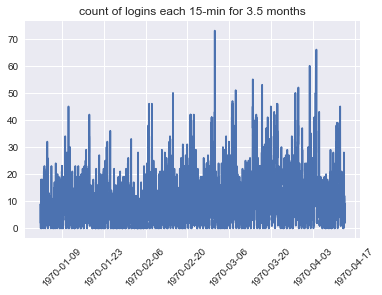

In [221]:
#All 3.5 months 

x = indexed_logins_df_15T['login_time']
y = indexed_logins_df_15T['count']
plt.plot(x,y)
plt.title('count of logins each 15-min for 3.5 months')
plt.xticks(rotation = 45);

In [222]:
jan = indexed_logins_df_15T[(indexed_logins_df_15T.login_time > '1970-01')&(indexed_logins_df_15T.login_time < '1970-02')]
feb = indexed_logins_df_15T[(indexed_logins_df_15T.login_time > '1970-02')&(indexed_logins_df_15T.login_time < '1970-03')]
mar = indexed_logins_df_15T[(indexed_logins_df_15T.login_time > '1970-03')&(indexed_logins_df_15T.login_time < '1970-04')]
apr = indexed_logins_df_15T[(indexed_logins_df_15T.login_time > '1970-04')&(indexed_logins_df_15T.login_time < '1970-05')]

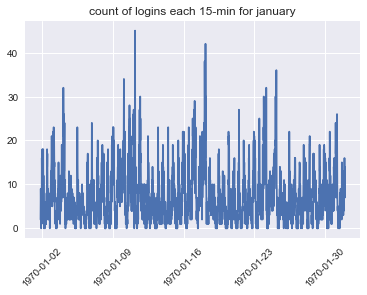

In [223]:
#January
x = jan['login_time']
y = jan['count']
plt.plot(x,y)
plt.title('count of logins each 15-min for january')
plt.xticks(rotation = 45);

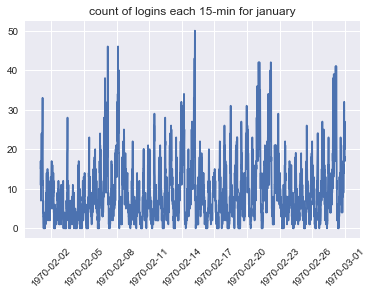

In [224]:
#Feb
x = feb['login_time']
y = feb['count']
plt.plot(x,y)
plt.title('count of logins each 15-min for january')
plt.xticks(rotation = 45);

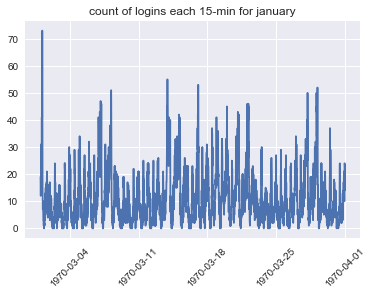

In [225]:
#Feb
x = mar['login_time']
y = mar['count']
plt.plot(x,y)
plt.title('count of logins each 15-min for january')
plt.xticks(rotation = 45);

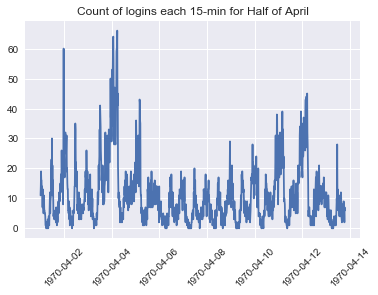

In [226]:
# April
x = apr['login_time']
y = apr['count']
plt.plot(x, y)
plt.title('Count of logins each 15-min for Half of April')
plt.xticks(rotation=45);

In [227]:

## After looking at the 3.5 months of available data, there seems to be no trend for weekly logins per month. Let's dive deeper into each week.

In [228]:
#counting based on weekdays, 0 = Monday, 6 = Sunday

indexed_logins_df_15T['weekday'] = indexed_logins_df_15T['login_time'].dt.dayofweek
wkday = indexed_logins_df_15T.sort_values(by = 'count', ascending = False)
wkday_counts = wkday[['count', 'weekday']]
wkday_count = wkday_counts.groupby('weekday').sum().reset_index()
wkday_count

,weekday,count
0,0,8823
1,1,9268
2,2,10339
3,3,11960
4,4,15208
5,5,19377
6,6,18167


In [229]:
# Giving names for the weekdays
wkday_count['weekday'] = ['Mon', 'Tues', 'Wed','Thurs',
                          'Fri', 'Sat', 'Sun']
wkday_count = wkday_count[['weekday', 'count']]
wkday_count

,weekday,count
0,Mon,8823
1,Tues,9268
2,Wed,10339
3,Thurs,11960
4,Fri,15208
5,Sat,19377
6,Sun,18167


Text(0.5,1,'Count of logins vs. weekday for 3.5 Months')

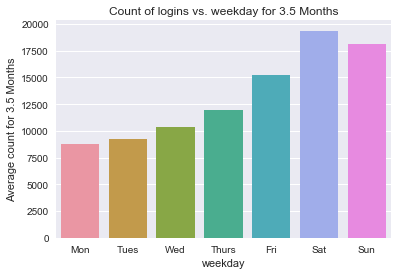

In [230]:
#Visualizing count of logins vs. weekday
sns.barplot(x = 'weekday', y = 'count', data = wkday_count)
plt.ylabel('Average count for 3.5 Months')
plt.xlabel('weekday')
plt.title('Count of logins vs. weekday for 3.5 Months')

In [231]:
#Splitting into hours
indexed_logins_df_15T['hour'] = indexed_logins_df_15T['login_time'].dt.hour
hours = indexed_logins_df_15T
hour = hours[['count', 'hour']]
hour = hour.groupby('hour').sum().reset_index()
hour.head()


,hour,count
0,0,5993
1,1,6317
2,2,5800
3,3,4831
4,4,5034


Text(0.5,1,'Average count of logins vs. Hour of day for 3.5 Months')

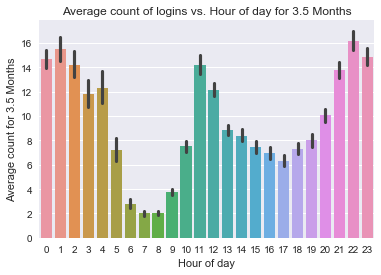

In [232]:
#Visualizing count of logins  per dat
sns.barplot(x = 'hour', y = 'count', data = hours)
plt.ylabel('Average count for 3.5 Months')
plt.xlabel('Hour of day')
plt.title('Average count of logins vs. Hour of day for 3.5 Months')

In [233]:
#Splitting into 15 minute intervals
indexed_logins_df_15T['15_minute'] = indexed_logins_df_15T['login_time'].dt.minute
minutes = indexed_logins_df_15T
minute = minutes[['count' , '15_minute']]
minute = minute.groupby('15_minute').sum().reset_index()
minute

,15_minute,count
0,0,22660
1,15,22975
2,30,23962
3,45,23545


Text(0.5,1,'Average count of logins vs. Minute of hour 3.5 Months')

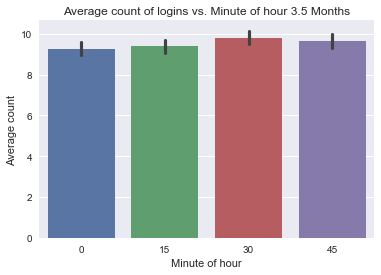

In [234]:
#Visualizing count of logins per quarter-hour
sns.barplot(x = '15_minute', y = 'count', data = minutes)
plt.ylabel('Average count')
plt.xlabel('Minute of hour')
plt.title('Average count of logins vs. Minute of hour 3.5 Months')

In [235]:
# Import json and read data into dataframe
import json

file = open('ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [236]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [238]:
# Impute in missing values
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['phone'].fillna('iPhone', inplace=True)

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [240]:
#convert objects to dates 
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [241]:
trips_city = (df[['trips_in_first_30_days', 'city' ]].groupby('city').sum().reset_index())
trips_city

,city,trips_in_first_30_days
0,Astapor,32219
1,King's Landing,24957
2,Winterfell,56734


Text(0.5,1,'Trips vs. City')

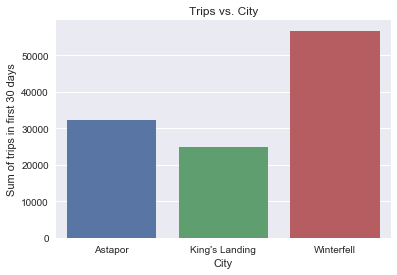

In [242]:
#Constructing barplot 
sns.barplot(x = 'city', y = 'trips_in_first_30_days', data = trips_city)
plt.ylabel('Sum of trips in first 30 days')
plt.xlabel('City')
plt.title('Trips vs. City')

In [243]:
trips_phone = df[['trips_in_first_30_days', 'phone']].groupby('phone').sum().reset_index()
trips_phone

,phone,trips_in_first_30_days
0,Android,29067
1,iPhone,84843


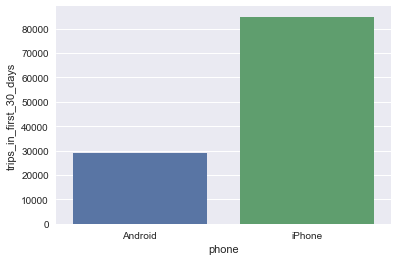

In [244]:
#Constructing barplot
sns.barplot(x = 'phone', y = 'trips_in_first_30_days', data = trips_phone)

In [245]:
#getting last trip date recorded
df[['last_trip_date']].max()

last_trip_date   2014-07-01
dtype: datetime64[ns]

In [246]:
#Active users
len(df[df['last_trip_date'] >= '2014-06-01'])

18804

In [247]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [248]:
Black_user = (df[['ultimate_black_user', 'city' ]].groupby('city').sum().reset_index())
Black_user

,city,ultimate_black_user
0,Astapor,6477.0
1,King's Landing,4206.0
2,Winterfell,8171.0


In [249]:
Phone_city = (df[['phone', 'city' ]].groupby('phone').sum().reset_index())
Phone_city

,phone,city
0,Android,AstaporWinterfellAstaporWinterfellWinterfellAs...
1,iPhone,King's LandingAstaporKing's LandingWinterfellW...


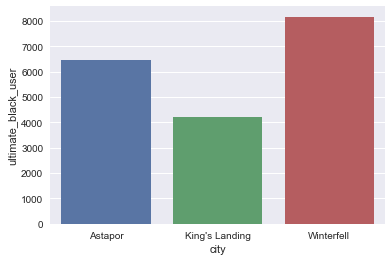

In [250]:
#Constructing barplot
sns.barplot(x = 'city', y = 'ultimate_black_user', data = Black_user)

In [251]:
Surge_pct_city = df[['city', 'surge_pct']].groupby('city').mean().reset_index()
Surge_pct_city

,city,surge_pct
0,Astapor,10.140305
1,King's Landing,9.966979
2,Winterfell,7.449927


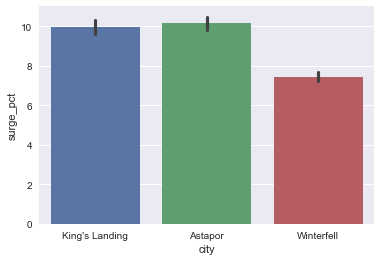

In [252]:
#constructing Bar Plot
sns.barplot(x = 'city', y = 'surge_pct', data = df )

In [253]:
df['num_of_days_active']= df['last_trip_date'] - df['signup_date']

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
num_of_days_active        50000 non-null timedelta64[ns]
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2), timedelta64[ns](1)
memory usage: 4.6+ MB


In [255]:
from datetime import datetime, timedelta

In [256]:
df['num_of_days_active'] = df.num_of_days_active.dt.days

In [257]:
Active_city = (df[['num_of_days_active', 'city' ]].groupby('city').sum().reset_index())
Active_city

,city,num_of_days_active
0,Astapor,1360276
1,King's Landing,1181690
2,Winterfell,2097539


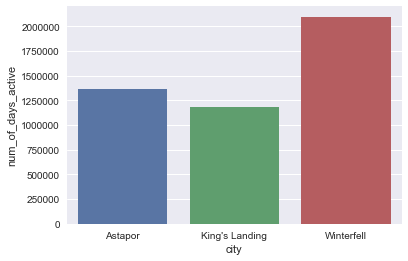

In [258]:
sns.barplot( x = 'city', y = 'num_of_days_active', data = Active_city)

In [259]:
Astapor = df.loc[df['city']=='Astapor']
Winterfell = df.loc[df['city']=='Winterfell']
Kingslanding_ = df.loc[df['city']!='Astapor']
kingslanding = df.loc[df['city']!='Winterfell']

In [260]:
Astapor.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,num_of_days_active
count,16534.000000,16534.000000,16534.000000,16534.000000,16534.000000,16534.000000,16534.000000,16534.000000
mean,5.427940,4.798780,4.625523,1.086522,10.140305,1.948651,60.370050,82.271441
std,5.513792,0.436819,0.546789,0.239778,21.947097,3.333600,38.399236,59.933070
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.430000,4.800000,4.500000,1.000000,0.000000,0.000000,33.300000,15.000000
50%,3.770000,5.000000,4.800000,1.000000,0.000000,1.000000,66.700000,91.000000
75%,6.290000,5.000000,5.000000,1.060000,10.700000,2.000000,100.000000,137.000000
max,160.960000,5.000000,5.000000,4.000000,100.000000,73.000000,100.000000,181.000000


In [261]:
Winterfell.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,num_of_days_active
count,23336.000000,23336.000000,23336.000000,23336.000000,23336.000000,23336.000000,23336.000000,23336.000000
mean,5.980153,4.731117,4.544608,1.068194,7.449927,2.431179,60.318936,89.884256
std,5.661458,0.486703,0.605563,0.231705,18.832043,3.835147,37.023732,62.695904
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.470000,4.600000,4.400000,1.000000,0.000000,0.000000,33.300000,22.000000
50%,4.020000,5.000000,4.601559,1.000000,0.000000,1.000000,66.700000,104.000000
75%,7.310000,5.000000,5.000000,1.020000,4.500000,3.000000,100.000000,149.000000
max,79.690000,5.000000,5.000000,8.000000,100.000000,71.000000,100.000000,181.000000


In [262]:
kingslanding.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,num_of_days_active
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,5.636382,4.819328,4.651403,1.080513,10.074456,2.144314,61.457452,95.333258
std,5.742531,0.402062,0.521833,0.213639,20.818426,3.750081,37.124537,61.518773
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.390000,4.800000,4.600000,1.000000,0.000000,0.000000,33.300000,32.000000
50%,3.760000,5.000000,4.800000,1.000000,0.000000,1.000000,66.700000,114.000000
75%,6.610000,5.000000,5.000000,1.070000,12.500000,2.000000,100.000000,151.000000
max,160.960000,5.000000,5.000000,4.000000,100.000000,125.000000,100.000000,181.000000


In [263]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,num_of_days_active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,143
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,96
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,170
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,47


In [264]:
df['active_user'] = df['num_of_days_active'].apply(lambda x: int(x >= 150))

In [265]:
df['phone'] = df['phone'].apply(lambda x: int(x == 'iphone'))
df['ultimate_black_user'] = df['ultimate_black_user'].apply(lambda x: int(x == True))

In [266]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,num_of_days_active,active_user
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,0,2014-01-25,15.4,4,1,46.2,143,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,0,2014-01-29,0.0,0,0,50.0,96,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,0,2014-01-06,0.0,3,0,100.0,1,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,0,2014-01-10,20.0,9,1,80.0,170,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,0,2014-01-27,11.8,14,0,82.4,47,0


In [267]:
Cat_df = df.select_dtypes(exclude = [np.number])

In [268]:
Cat_df = Cat_df.drop('last_trip_date', axis = 1)

In [269]:
Dummies = pd.get_dummies(Cat_df)

In [270]:
Dummies.head()

,signup_date,city_Astapor,city_King's Landing,city_Winterfell
0,2014-01-25,0,1,0
1,2014-01-29,1,0,0
2,2014-01-06,1,0,0
3,2014-01-10,0,1,0
4,2014-01-27,0,0,1


In [271]:
Fdata = pd.concat([df, Dummies])

In [272]:
Fdata.drop('city', axis = 1, inplace = True)

In [273]:
Fdata.head()

,active_user,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city_Astapor,city_King's Landing,city_Winterfell,last_trip_date,num_of_days_active,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,0.0,3.67,5.0,4.7,1.10,NaN,NaN,NaN,2014-06-17,143.0,0.0,2014-01-25,15.4,4.0,1.0,46.2
1,0.0,8.26,5.0,5.0,1.00,NaN,NaN,NaN,2014-05-05,96.0,0.0,2014-01-29,0.0,0.0,0.0,50.0
2,0.0,0.77,5.0,4.3,1.00,NaN,NaN,NaN,2014-01-07,1.0,0.0,2014-01-06,0.0,3.0,0.0,100.0
3,1.0,2.36,4.9,4.6,1.14,NaN,NaN,NaN,2014-06-29,170.0,0.0,2014-01-10,20.0,9.0,1.0,80.0
4,0.0,3.13,4.9,4.4,1.19,NaN,NaN,NaN,2014-03-15,47.0,0.0,2014-01-27,11.8,14.0,0.0,82.4


In [274]:
Fdata.fillna(0)

,active_user,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city_Astapor,city_King's Landing,city_Winterfell,last_trip_date,num_of_days_active,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,0.0,3.67,5.0,4.700000,1.10,0.0,0.0,0.0,2014-06-17 00:00:00,143.0,0.0,2014-01-25,15.4,4.0,1.0,46.2
1,0.0,8.26,5.0,5.000000,1.00,0.0,0.0,0.0,2014-05-05 00:00:00,96.0,0.0,2014-01-29,0.0,0.0,0.0,50.0
2,0.0,0.77,5.0,4.300000,1.00,0.0,0.0,0.0,2014-01-07 00:00:00,1.0,0.0,2014-01-06,0.0,3.0,0.0,100.0
3,1.0,2.36,4.9,4.600000,1.14,0.0,0.0,0.0,2014-06-29 00:00:00,170.0,0.0,2014-01-10,20.0,9.0,1.0,80.0
4,0.0,3.13,4.9,4.400000,1.19,0.0,0.0,0.0,2014-03-15 00:00:00,47.0,0.0,2014-01-27,11.8,14.0,0.0,82.4
5,0.0,10.56,5.0,3.500000,1.00,0.0,0.0,0.0,2014-06-06 00:00:00,148.0,0.0,2014-01-09,0.0,2.0,1.0,100.0
6,0.0,3.95,4.0,4.601559,1.00,0.0,0.0,0.0,2014-01-25 00:00:00,1.0,0.0,2014-01-24,0.0,1.0,0.0,100.0
7,0.0,2.04,5.0,5.000000,1.00,0.0,0.0,0.0,2014-01-29 00:00:00,1.0,0.0,2014-01-28,0.0,2.0,0.0,100.0
8,0.0,4.36,5.0,4.500000,1.00,0.0,0.0,0.0,2014-02-01 00:00:00,11.0,0.0,2014-01-21,0.0,2.0,0.0,100.0
9,0.0,2.37,5.0,4.601559,1.00,0.0,0.0,0.0,2014-01-05 00:00:00,2.0,0.0,2014-01-03,0.0,1.0,0.0,0.0


In [275]:
Fdata.drop(['signup_date'], axis = 1, inplace = True)

In [276]:
Fdata.head()

,active_user,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city_Astapor,city_King's Landing,city_Winterfell,last_trip_date,num_of_days_active,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,0.0,3.67,5.0,4.7,1.10,NaN,NaN,NaN,2014-06-17,143.0,0.0,15.4,4.0,1.0,46.2
1,0.0,8.26,5.0,5.0,1.00,NaN,NaN,NaN,2014-05-05,96.0,0.0,0.0,0.0,0.0,50.0
2,0.0,0.77,5.0,4.3,1.00,NaN,NaN,NaN,2014-01-07,1.0,0.0,0.0,3.0,0.0,100.0
3,1.0,2.36,4.9,4.6,1.14,NaN,NaN,NaN,2014-06-29,170.0,0.0,20.0,9.0,1.0,80.0
4,0.0,3.13,4.9,4.4,1.19,NaN,NaN,NaN,2014-03-15,47.0,0.0,11.8,14.0,0.0,82.4


In [277]:
Fdata=Fdata.fillna(0)

In [278]:
Fdata.head()

,active_user,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city_Astapor,city_King's Landing,city_Winterfell,last_trip_date,num_of_days_active,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,0.0,3.67,5.0,4.7,1.10,0.0,0.0,0.0,2014-06-17 00:00:00,143.0,0.0,15.4,4.0,1.0,46.2
1,0.0,8.26,5.0,5.0,1.00,0.0,0.0,0.0,2014-05-05 00:00:00,96.0,0.0,0.0,0.0,0.0,50.0
2,0.0,0.77,5.0,4.3,1.00,0.0,0.0,0.0,2014-01-07 00:00:00,1.0,0.0,0.0,3.0,0.0,100.0
3,1.0,2.36,4.9,4.6,1.14,0.0,0.0,0.0,2014-06-29 00:00:00,170.0,0.0,20.0,9.0,1.0,80.0
4,0.0,3.13,4.9,4.4,1.19,0.0,0.0,0.0,2014-03-15 00:00:00,47.0,0.0,11.8,14.0,0.0,82.4


In [279]:
Fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 49999
Data columns (total 15 columns):
active_user               100000 non-null float64
avg_dist                  100000 non-null float64
avg_rating_by_driver      100000 non-null float64
avg_rating_of_driver      100000 non-null float64
avg_surge                 100000 non-null float64
city_Astapor              100000 non-null float64
city_King's Landing       100000 non-null float64
city_Winterfell           100000 non-null float64
last_trip_date            100000 non-null object
num_of_days_active        100000 non-null float64
phone                     100000 non-null float64
surge_pct                 100000 non-null float64
trips_in_first_30_days    100000 non-null float64
ultimate_black_user       100000 non-null float64
weekday_pct               100000 non-null float64
dtypes: float64(14), object(1)
memory usage: 12.2+ MB


In [280]:
y = Fdata['active_user']

In [281]:
Fdata.drop('active_user', axis = 1, inplace = True)

In [282]:
X = Fdata

In [287]:
X = X.drop('last_trip_date', axis = 1, inplace = True)

ValueError: labels ['last_trip_date'] not contained in axis

In [295]:
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.20, random_state=5)


In [296]:
from sklearn.linear_model import LogisticRegression

In [297]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [300]:
from sklearn.metrics import accuracy_score
print("Accuracy score: ", accuracy_score(clf.predict(X_test), y_test))

Accuracy score:  0.99425


In [302]:

print("Regression coefficients: ", clf.coef_)
print("Column names: ", (X.columns.values))

Regression coefficients:  [[-2.33109111e-03 -1.28637840e+00 -4.34745587e-01 -2.58560458e+00
  -2.11955955e-01 -1.59889173e-01 -2.52327541e-01  3.40311538e-01
   0.00000000e+00  2.28114755e-02  1.02662031e-02 -1.80145818e-02
  -7.74462297e-05]]
Column names:  ['avg_dist' 'avg_rating_by_driver' 'avg_rating_of_driver' 'avg_surge'
 'city_Astapor' "city_King's Landing" 'city_Winterfell'
 'num_of_days_active' 'phone' 'surge_pct' 'trips_in_first_30_days'
 'ultimate_black_user' 'weekday_pct']


In [303]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

/Volumes/Untitled/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:            active_user   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     8980.
Date:                Wed, 23 May 2018   Prob (F-statistic):               0.00
Time:                        21:41:08   Log-Likelihood:                 4593.7
No. Observations:              100000   AIC:                            -9161.
Df Residuals:                   99987   BIC:                            -9038.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0